# Local Elite Finding

In [34]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import operator
import os
print(os.getcwd())
print(os.listdir('/Users/Brandon/Yelp Dataset/dataset'))
import json
import glob

/Users/Brandon/Yelp Dataset/Yelp-FA17/local-elites/brandon
['.DS_Store', 'business.json', 'checkin.json', 'photos.json', 'review.json', 'review1.json', 'review2.json', 'review3.json', 'review4.json', 'review5.json', 'review5000.json', 'tip.json', 'user.json']


In [60]:
def load_json_to_df(datapass):
    '''
    Load the json file and parse the file to pandas dataframe format
    
    Input:
        datapass(str) : directory to the json file
    Output:
        df(dataframe) : pandas dataframe object
    '''
    
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [ ]:
import_file = "/Users/Brandon/Yelp Dataset/dataset/review.json"
#json_pattern = os.path.join(import_file,'review[0-9].json')
#file_list = glob.glob(json_pattern)

review = load_json_to_df(import_file)

In [59]:
import_file = '/Users/Brandon/Yelp Dataset/dataset/business.json'
business = pd.read_json(import_file, lines=True)

In [74]:
%%time
import_file = '/Users/Brandon/Yelp Dataset/dataset/user5000.json'
user = pd.read_json(import_file, lines=True)

CPU times: user 334 ms, sys: 752 ms, total: 1.09 s
Wall time: 2.38 s


In [196]:
list(user)

['average_stars',
 'compliment_cool',
 'compliment_cute',
 'compliment_funny',
 'compliment_hot',
 'compliment_list',
 'compliment_more',
 'compliment_note',
 'compliment_photos',
 'compliment_plain',
 'compliment_profile',
 'compliment_writer',
 'cool',
 'elite',
 'fans',
 'friends',
 'funny',
 'name',
 'review_count',
 'useful',
 'user_id',
 'yelping_since']

Find which businesses are classified as a specific category. Here we do an example just looking at restaurants.

In [156]:
#user[user['review_count']>5000]
list(business)
def categoryFind(x,cat):
    return cat in x;
restaurantIndex = business['categories'].apply(categoryFind,cat='Restaurants')
restaurants = business[restaurantIndex]
len(restaurants)


51613

We have 51613 businesses, let's try to look at just the first 500 for now.

Let's take a look at reviews

In [191]:
#list(review)
list(business)

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [184]:
%%time
businessReviews = pd.merge(review, business,on='business_id',right_index=True,sort=False)

CPU times: user 9.26 s, sys: 1.74 s, total: 11 s
Wall time: 11.2 s


In [195]:
businessReviews#[['business_id','user_id']]
#list(businessReviews)

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,address,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars_y,state
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
5,uYHaNptLzDLoV_JZ_MuzUA,0,2016-06-05,0,GvLmUkjUrOyFH8KFnmT1uw,5,Erstklassige Lage. Dazu ist alles geschrieben ...,0,rW8q706dz5-NnXDzMwVkiw,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
6,uYHaNptLzDLoV_JZ_MuzUA,0,2015-02-21,0,lGEl24NGj2HVBJrodeXcjg,4,"Beautiful space, great location, staff rock. T...",0,yx8vNXUL0D0HS8rUIC7AFA,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
7,uYHaNptLzDLoV_JZ_MuzUA,0,2013-07-07,0,cUgvEy5wj7zYE68v1BzzVg,4,This is a fairly new property I think. It is a...,0,zXnH6W74FAJQ7q7b-NuBsA,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
8,uYHaNptLzDLoV_JZ_MuzUA,2,2013-04-27,0,FSB_BnvysBgH3JYrbFNcgw,4,First time at this group of hotels. Pretty new...,2,c5yp5hxwC1N98MjbV2LyWQ,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH
9,uYHaNptLzDLoV_JZ_MuzUA,0,2015-04-13,0,dhl3ZW9aAEX_T7_um5tfaQ,4,Location location location! \n\nMotel One is j...,2,xJisL5w4wOgiYLokGMT_IA,Market Street,...,{},1,55.950875,-3.191463,Motel One,Royal Mile,EH1,16,4.0,EDH


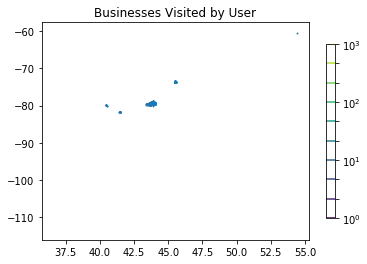

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

X_train = []
for i in range(len(latitudes)):
    X_train.append([latitudes[i],longitudes[i]])
X_train = np.array(X_train)

# fit a Gaussian Mixture Model with one component
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf.fit(X_train)

In [82]:
center = clf.means_[0]

In [83]:
center

array([ 43.80458255, -79.20813192])

In [86]:
import reverse_geocoder as rg

coordinates = (center[0],center[1])

results = rg.search(coordinates) # default mode = 2

print results

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-86-7cb3af9a6275>, line 7)

In [ ]:
# review, business